### This notebook contains code for model testing and selection.

### Contributors: Developed by Gökalp Özer with the help of Mete Mert Birdal and Abdullah Palaz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import keras
from keras import models
from keras import layers
import os
from os import listdir
from os.path import isfile, join
from sklearn.metrics import accuracy_score

In [2]:
# reading dataset from csv

data = pd.read_csv("data.csv")
data.head()

,song_name,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,polarity
0,3 Doors Down - Here Without You.mp3,0.289081,0.160753,1875.872919,2086.083922,3839.096230,0.080104,-120.545860,116.146255,-16.438173,...,-3.464103,-4.438722,-2.127836,-4.158795,2.548140,-8.946958,2.383594,-10.388559,-5.975074,1
1,Adam Lambert - Whataya Want from Me.mp3,0.355750,0.221183,2530.576767,2542.919690,5433.608810,0.106720,-65.254929,77.532669,-2.125923,...,3.356047,-0.555968,2.435497,-1.882958,-0.076031,-3.791277,2.699635,-1.652489,3.940006,1
2,Adele - Easy On Me.mp3,0.262327,0.181580,1918.322782,2243.506341,4388.587352,0.069737,-158.698792,119.309517,24.319859,...,2.845815,-3.271787,-3.322470,0.601871,-6.692018,-1.598950,7.785903,-1.588815,10.148050,1
3,Adele - Make You Feel My Love.mp3,0.292123,0.116284,1064.064225,1427.885838,1986.143546,0.046679,-222.517914,161.673782,2.692116,...,3.343680,-6.928495,1.509124,-4.121449,-11.299839,-4.258877,-2.200528,-4.374411,-1.815166,1
4,"Alan Walker, Ava Max - Alone, Pt. II.mp3",0.338901,0.231402,2337.968667,2517.650456,4869.673332,0.102979,-78.251495,95.489693,-13.360953,...,2.130660,-7.129215,1.655985,-6.318650,1.480218,-0.576925,5.278685,-3.926069,6.590695,0


In [3]:
data = data.sample(frac = 1, random_state = 10).reset_index(drop=True)
data.head()

,song_name,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,polarity
0,"Bahamas, Madison Cunningham - Be My Witness (f...",0.342932,0.163363,1569.343678,1985.084157,3427.707051,0.059877,-148.713455,135.504669,11.027342,...,0.817397,-0.625243,1.664817,-2.294284,3.367950,-3.857531,-1.557467,-4.445862,0.289576,0
1,The Offspring - The Kids Aren't Alright.mp3,0.410226,0.235695,2432.832611,2344.959235,4965.686640,0.119506,-3.456875,90.056816,-25.072218,...,-2.072496,-7.041440,-2.466044,-7.760959,-2.373715,-8.303421,-0.855154,-4.360817,1.856898,0
2,Faith Hill - Breathe.mp3,0.324153,0.148818,2436.451795,2607.899245,5355.862058,0.111220,-127.268867,87.350380,3.662381,...,-3.161658,-7.834926,0.489897,-6.119314,0.637559,-5.098304,0.529420,-4.044796,-0.622057,0
3,The Skatalites - Eastern Standard Time.mp3,0.442773,0.123286,2396.140950,2252.489331,4762.382314,0.126297,-97.405205,82.513336,-27.231873,...,8.827895,-7.340616,5.602109,-2.157922,7.205108,-4.342024,4.456456,-3.218498,4.762727,0
4,Albert Collins - Blue Monday Hangover - Remast...,0.384747,0.133702,2171.121864,2217.921091,4447.700883,0.111578,-129.032272,93.447449,-8.623260,...,3.287340,-3.296253,1.308170,-3.502340,-0.205946,-5.999989,3.092426,-2.910830,2.285146,1


In [4]:
x = data.iloc[0:100, 1:]
y = np.array([1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1])
X_test = data.iloc[100:, 1:]
#train-test split
X_train, validation_x, y_train, validation_y = train_test_split(x,y,test_size=0.25)

In [5]:
# normalizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
validation_x = scaler.fit_transform(validation_x)
X_test = scaler.fit_transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric="minkowski")
knn.fit(X_train, y_train)                             
y_pred = knn.predict(validation_x)

unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))
print("Accuracy :", accuracy_score(validation_y, y_pred))

{0: 15, 1: 10}
Accuracy : 0.52


In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(validation_x)

unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))
print("Accuracy :", accuracy_score(validation_y, y_pred))

{0: 23, 1: 2}
Accuracy : 0.68


In [8]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)
y_pred = logr.predict(validation_x)

unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))
print("Accuracy :", accuracy_score(validation_y, y_pred))

{0: 18, 1: 7}
Accuracy : 0.88


In [9]:
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=4,
                    validation_data=(validation_x, validation_y))

Epoch 1/40
19/19 [==============================] - 0s 8ms/step - loss: 1.1371 - accuracy: 0.3733 - val_loss: 0.8185 - val_accuracy: 0.6000
Epoch 2/40
19/19 [==============================] - 0s 1ms/step - loss: 0.9991 - accuracy: 0.4133 - val_loss: 0.7426 - val_accuracy: 0.6800
Epoch 3/40
19/19 [==============================] - 0s 1ms/step - loss: 0.9013 - accuracy: 0.4400 - val_loss: 0.6814 - val_accuracy: 0.6800
Epoch 4/40
19/19 [==============================] - 0s 1ms/step - loss: 0.8144 - accuracy: 0.4800 - val_loss: 0.6406 - val_accuracy: 0.7200
Epoch 5/40
19/19 [==============================] - 0s 1ms/step - loss: 0.7514 - accuracy: 0.5867 - val_loss: 0.6068 - val_accuracy: 0.6800
Epoch 6/40
19/19 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.6267 - val_loss: 0.5798 - val_accuracy: 0.7200
Epoch 7/40
19/19 [==============================] - 0s 1ms/step - loss: 0.6451 - accuracy: 0.6933 - val_loss: 0.5613 - val_accuracy: 0.6800
Epoch 8/40
19/19 [==

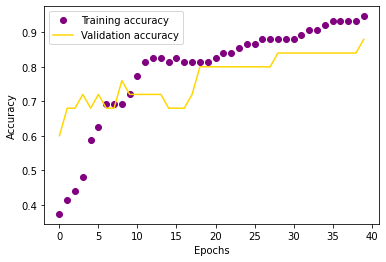

In [11]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(int(len(accuracy)))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='purple')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy', color='gold')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.savefig('accuracy.png', bbox_inches="tight")
plt.show()

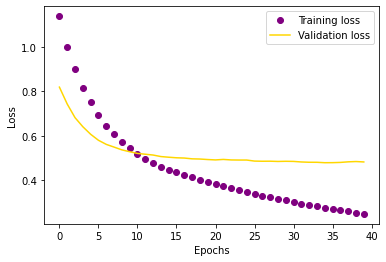

In [12]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss', color='purple')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='gold')
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.savefig('loss.png', bbox_inches="tight")
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

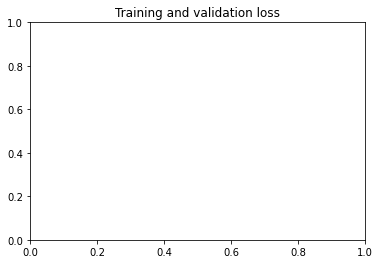

In [13]:
plt.title('Training and validation accuracy')
plt.title('Training and validation loss')

In [14]:
names = pd.DataFrame(data.iloc[100:, :1].values, columns = ["song_names"])
values = pd.DataFrame(model.predict(X_test), columns = ["values"])
recommend_df = pd.concat([names, values], axis=1).sort_values("values", ascending=False).reset_index(drop=True)
recommend_df

,song_names,values
0,"Doja Cat, SZA - Kiss Me More (feat. SZA).mp3",0.996890
1,Bruce Springsteen - Santa Claus Is Comin' to T...,0.990031
2,Taylor Swift - Blank Space.mp3,0.986656
3,"B.o.B, Bruno Mars - Nothin' on You (feat. Brun...",0.984559
4,"BENEE, Gus Dapperton - Supalonely (feat. Gus D...",0.982382
...,...,...
1536,Nick Drake - Pink Moon.mp3,0.001910
1537,Kansas - Dust in the Wind.mp3,0.001488
1538,Bob Dylan - Shelter from the Storm.mp3,0.001486
1539,Stealers Wheel - Stuck In The Middle With You.mp3,0.001450


In [15]:
print("RECOMMENDED SONGS:")
for i in range(10):
    print(recommend_df["song_names"][i])

RECOMMENDED SONGS:
Doja Cat, SZA - Kiss Me More (feat. SZA).mp3
Bruce Springsteen - Santa Claus Is Comin' to Town - Live at C.W. Post College, Greenvale, NY - December 1975.mp3
Taylor Swift - Blank Space.mp3
B.o.B, Bruno Mars - Nothin' on You (feat. Bruno Mars).mp3
BENEE, Gus Dapperton - Supalonely (feat. Gus Dapperton).mp3
Florence + The Machine - Dog Days Are Over.mp3
Doja Cat - Need to Know.mp3
Mischa Daniels, Crown - Another Place - Radio Edit.mp3
Ava Max - Salt.mp3
Sonny Clark - Cool Struttin'.mp3


In [16]:
from sklearn.inspection import permutation_importance

**Permutation Feature Importance**

In [17]:
# perform permutation importance
results = permutation_importance(model, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean

column_names = list(x.columns)

for i in range(len(importance)):
    print("Feature: {}, Score: {}".format(column_names[i],importance[i]))


Feature: chroma_stft, Score: 0.010145411359851328
Feature: rmse, Score: 0.017308461520089503
Feature: spectral_centroid, Score: 0.009757009386183128
Feature: spectral_bandwidth, Score: 0.0050981552882547465
Feature: rolloff, Score: 0.020648763730369522
Feature: zero_crossing_rate, Score: 0.0035727729697960205
Feature: mfcc1, Score: 0.008692824412716921
Feature: mfcc2, Score: 0.005661350336499055
Feature: mfcc3, Score: 0.01617584475390659
Feature: mfcc4, Score: 0.018467386839170652
Feature: mfcc5, Score: 0.011058826010984063
Feature: mfcc6, Score: 0.017024576733580463
Feature: mfcc7, Score: 0.00729596492002293
Feature: mfcc8, Score: 0.022701454567970892
Feature: mfcc9, Score: 0.009392833654046442
Feature: mfcc10, Score: 0.01676707233712979
Feature: mfcc11, Score: 0.009079977864371789
Feature: mfcc12, Score: 0.008123015401539629
Feature: mfcc13, Score: 0.00790023461419564
Feature: mfcc14, Score: 0.015329550983205268
Feature: mfcc15, Score: 0.014582031362837092
Feature: mfcc16, Score: 0.0

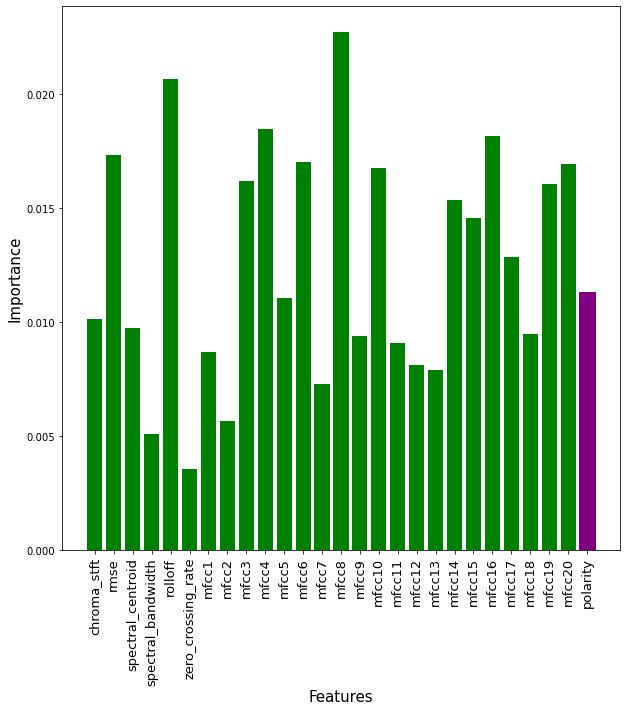

In [39]:
# plot feature importance
plt.figure(figsize=(10,10))
barlist = plt.bar([x for x in range(len(importance))], importance, color = "green")
barlist[26].set_color('purple')
plt.xticks(ticks=range(27), labels=column_names, rotation="vertical", fontsize=13)
plt.ylabel("Importance", fontsize=15)
plt.xlabel("Features", fontsize=15)
plt.savefig('importance.png', bbox_inches="tight")
plt.show()